<h1 align="center"><strong>Buddy Bass Fishing Tournament</strong></h1>

<div align="center"><img src="images/PB040066.JPG" height="750" /></div>

<p align="center">Pictured: Sam and Bob Perry</p>

The Buddy Bass Tournament on Williamstown Lake was started in 1985 by twin brothers: Bob and Sam Perry. They held their final tournament season in 2020.  


In this notebook, I'll take a look at the dataset from the Buddy Bass Tournament 2020 Season to try to *insert what I'm going to do here*. I will use the following dataset: dataset/Buddy_Bass_Tournament_2020.xlsx, that I received from my dad, Sam Perry.

Dataset:
The dataset I'll use is an excel spreadsheet with data collected from the weekly fishing tournament.

<h2><strong>1. Read the Data In</strong></h2>

This is where I import any needed Python libraries and all datasets I'll use in this notebook.

In [318]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd


# Column of dates to parse
date_col = ["Date"]

# Read the Excel file for the 2020 tournament and skip 2 rows so the dataframe starts with the column headers
buddy_bass_tournament20 = pd.read_excel("data/Buddy_Bass_Tournament_2020.xlsx", skiprows = 2)

In [319]:
# View the first five rows of data
buddy_bass_tournament20.head()

,Date,Number of Boats,Total No of Fish Caught,Total Weight in Pounds,Big Fish (LBS),Avg Water Temp,Big Fish/Year (LBS)
0,2020-06-03,25.0,28.0,46.20,4.56,NaN,NaN
1,2020-06-10,28.0,71.0,105.98,4.80,NaN,NaN
2,2020-06-24,29.0,49.0,77.00,4.32,75.2,Wieda/Young 5.48 *
3,2020-07-01,33.0,61.0,83.86,5.26,76.8,""""
4,2020-07-08,26.0,50.0,74.30,4.50,76.8,""""


<h2><strong>2. Manipulate and Clean the Data</strong></h2>
<p>I noticed after reading in the dataset that:</p>
<ol>
<li>The dataset had NaNs (Not a Number) appearing in several columns</li>
<li>The dates in the "Date" column need to start on 2020-06-10 instead of 2022-06-03</li>
<li>I didn't need the "Big Fish/Year (LBS)" columns</li>
</ol>

<h3><strong>1. Decide what to do about the NaNs appearing in the dataframe</strong></h3>

In [320]:
# Seeing where all the NaN values are in the dataframe
buddy_bass_tournament20[buddy_bass_tournament20.isna().any(axis=1)]

,Date,Number of Boats,Total No of Fish Caught,Total Weight in Pounds,Big Fish (LBS),Avg Water Temp,Big Fish/Year (LBS)
0,2020-06-03,25.0,28.0,46.20,4.56,NaN,NaN
1,2020-06-10,28.0,71.0,105.98,4.80,NaN,NaN
8,2020-08-05,37.0,71.0,102.92,5.44,82.0,NaN
9,2020-08-12,31.0,33.0,41.40,2.34,84.6,NaN
10,2020-08-19,28.0,58.0,75.42,4.46,85.3,NaN
11,2020-08-26,30.0,33.0,48.44,2.84,85.3,NaN
12,NaT,NaN,NaN,NaN,NaN,NaN,NaN
13,NaT,NaN,NaN,NaN,NaN,NaN,NaN
14,2020-09-13,27.0,84.0,125.42,4.28,78.8,NaN


<p>I checked the excel file to see why I had two rows full of NaN/NaT values. Those two rows (12, 13) were blank in the file. I decided to drop those two rows.</p>

In [321]:
# Drop any row that has "NaN" value for "Number of Boats" and reset the index
buddy_bass_tournament20 = buddy_bass_tournament20.dropna(subset=["Number of Boats"]).reset_index()

buddy_bass_tournament20

,index,Date,Number of Boats,Total No of Fish Caught,Total Weight in Pounds,Big Fish (LBS),Avg Water Temp,Big Fish/Year (LBS)
0,0,2020-06-03,25.0,28.0,46.20,4.56,NaN,NaN
1,1,2020-06-10,28.0,71.0,105.98,4.80,NaN,NaN
2,2,2020-06-24,29.0,49.0,77.00,4.32,75.2,Wieda/Young 5.48 *
3,3,2020-07-01,33.0,61.0,83.86,5.26,76.8,""""
4,4,2020-07-08,26.0,50.0,74.30,4.50,76.8,""""
5,5,2020-07-15,29.0,54.0,68.27,4.26,78.5,""""
6,6,2020-07-22,32.0,48.0,58.49,5.36,80.4,""""
7,7,2020-07-29,31.0,56.0,76.58,3.36,82.0,""""
8,8,2020-08-05,37.0,71.0,102.92,5.44,82.0,NaN
9,9,2020-08-12,31.0,33.0,41.40,2.34,84.6,NaN


<h3><strong>1. Fix the dates in the "Date" column</strong></h3>

In [322]:
# # Create date range that starts on 06/10/2022 and then every Wednesday for the next 15 periods
# dates = pd.Series(pd.date_range("06/10/2020", freq="W-WED", periods=15))

# print(dates)

In [323]:
# # Replace "Date" column with date series 
# buddy_bass_tournament20["Date"] = dates

# # View "Date" column to verify date series was added to column
# buddy_bass_tournament20[["Date"]]

In [324]:
buddy_bass_tournament20[["Date", "Avg Water Temp"]]

,Date,Avg Water Temp
0,2020-06-03,NaN
1,2020-06-10,NaN
2,2020-06-24,75.2
3,2020-07-01,76.8
4,2020-07-08,76.8
5,2020-07-15,78.5
6,2020-07-22,80.4
7,2020-07-29,82.0
8,2020-08-05,82.0
9,2020-08-12,84.6


In [325]:
# Use this link to fill in the missing "Avg Water Temp" values 
# https://lakemonster.com/lake/%20KENTUCKY%20/Williamstown%20Lake-water-temperature-5231

buddy_bass_tournament20.loc[0, ["Avg Water Temp"]] = [74.2]
buddy_bass_tournament20.loc[1, ["Avg Water Temp"]] = [75]

buddy_bass_tournament20[["Avg Water Temp"]]

,Avg Water Temp
0,74.2
1,75.0
2,75.2
3,76.8
4,76.8
5,78.5
6,80.4
7,82.0
8,82.0
9,84.6


In [326]:
# # View buddy_bass_tournament20 to verify dates were correctly added to "Dates" column
# buddy_bass_tournament20.head()

<h3><strong>2. Drop the "Big Fish/Year (LBS)" columns</strong></h3>

In [327]:
# Drop the "Big Fish/Year (LBS)" columns and set the dataframe to buddy_bass_2020 variable
buddy_bass_2020 = buddy_bass_tournament20.drop(columns=['Big Fish/Year (LBS)'])

# View first five rows of data to confirm that the column is gone
buddy_bass_2020.head()

,index,Date,Number of Boats,Total No of Fish Caught,Total Weight in Pounds,Big Fish (LBS),Avg Water Temp
0,0,2020-06-03,25.0,28.0,46.20,4.56,74.2
1,1,2020-06-10,28.0,71.0,105.98,4.80,75.0
2,2,2020-06-24,29.0,49.0,77.00,4.32,75.2
3,3,2020-07-01,33.0,61.0,83.86,5.26,76.8
4,4,2020-07-08,26.0,50.0,74.30,4.50,76.8


In [328]:
buddy_bass_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   index                    13 non-null     int64         
 1   Date                     13 non-null     datetime64[ns]
 2   Number of Boats          13 non-null     float64       
 3   Total No of Fish Caught  13 non-null     float64       
 4   Total Weight in Pounds   13 non-null     float64       
 5   Big Fish (LBS)           13 non-null     float64       
 6   Avg Water Temp           13 non-null     float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 856.0 bytes


<h3><strong>3. Replace the NaNs in the dataset with 0</strong></h3>

In [329]:
# Fill all NaN in dataset with 0
buddy_bass_2020 = buddy_bass_2020.fillna(0)

<h2><strong>3. Analyze the Data</strong></h2>

In [330]:
# Display information about the columns including data type and number of any missing values
buddy_bass_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   index                    13 non-null     int64         
 1   Date                     13 non-null     datetime64[ns]
 2   Number of Boats          13 non-null     float64       
 3   Total No of Fish Caught  13 non-null     float64       
 4   Total Weight in Pounds   13 non-null     float64       
 5   Big Fish (LBS)           13 non-null     float64       
 6   Avg Water Temp           13 non-null     float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 856.0 bytes


In [331]:
# Return the number of rows and columns in the data
buddy_bass_2020.shape

(13, 7)

In [332]:
# Display a summary of statistics calculated for each column
buddy_bass_2020.describe()

,index,Number of Boats,Total No of Fish Caught,Total Weight in Pounds,Big Fish (LBS),Avg Water Temp
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,6.153846,29.692308,53.538462,75.713846,4.290769,79.607692
std,4.180234,3.198557,16.276852,24.735615,0.939241,3.972292
min,0.000000,25.000000,28.000000,41.400000,2.340000,74.200000
25%,3.000000,28.000000,48.000000,58.490000,4.260000,76.800000
50%,6.000000,29.000000,54.000000,75.420000,4.460000,78.800000
75%,9.000000,31.000000,61.000000,83.860000,4.800000,82.000000
max,14.000000,37.000000,84.000000,125.420000,5.440000,85.300000


In [333]:
# Creates an index of the column names
buddy_bass_2020.columns

Index(['index', 'Date', 'Number of Boats', 'Total No of Fish Caught',
       'Total Weight in Pounds', 'Big Fish (LBS)', 'Avg Water Temp'],
      dtype='object')

In [334]:
# Create a new column called "Average Fish Weight" with the data from calculating the average fish weight
buddy_bass_2020["Average Fish Weight"] = buddy_bass_2020["Total Weight in Pounds"] / buddy_bass_2020["Total No of Fish Caught"]

# 
print(buddy_bass_2020.head())

   index       Date  Number of Boats  Total No of Fish Caught  \
0      0 2020-06-03             25.0                     28.0   
1      1 2020-06-10             28.0                     71.0   
2      2 2020-06-24             29.0                     49.0   
3      3 2020-07-01             33.0                     61.0   
4      4 2020-07-08             26.0                     50.0   

   Total Weight in Pounds  Big Fish (LBS)  Avg Water Temp  Average Fish Weight  
0                   46.20            4.56            74.2             1.650000  
1                  105.98            4.80            75.0             1.492676  
2                   77.00            4.32            75.2             1.571429  
3                   83.86            5.26            76.8             1.374754  
4                   74.30            4.50            76.8             1.486000  


In [335]:
# Display only the "Number of Boats" and "Total No of Fish Caught" columns
buddy_bass_2020[["Number of Boats", "Total No of Fish Caught"]]

,Number of Boats,Total No of Fish Caught
0,25.0,28.0
1,28.0,71.0
2,29.0,49.0
3,33.0,61.0
4,26.0,50.0
5,29.0,54.0
6,32.0,48.0
7,31.0,56.0
8,37.0,71.0
9,31.0,33.0


In [336]:
# Display all the times "Number of Boats" was less than 30
buddy_bass_2020[buddy_bass_2020["Number of Boats"] < 30]

,index,Date,Number of Boats,Total No of Fish Caught,Total Weight in Pounds,Big Fish (LBS),Avg Water Temp,Average Fish Weight
0,0,2020-06-03,25.0,28.0,46.20,4.56,74.2,1.650000
1,1,2020-06-10,28.0,71.0,105.98,4.80,75.0,1.492676
2,2,2020-06-24,29.0,49.0,77.00,4.32,75.2,1.571429
4,4,2020-07-08,26.0,50.0,74.30,4.50,76.8,1.486000
5,5,2020-07-15,29.0,54.0,68.27,4.26,78.5,1.264259
10,10,2020-08-19,28.0,58.0,75.42,4.46,85.3,1.300345
12,14,2020-09-13,27.0,84.0,125.42,4.28,78.8,1.493095


In [337]:
# Find the median of the "Total No of Fish Caught" column
buddy_bass_2020["Total No of Fish Caught"].median()

54.0

In [338]:
# Add a new column "Month" that turns the "Date" column into only the month name
buddy_bass_2020["Month"] = buddy_bass_2020["Date"]\
    .dt.month_name()

print(buddy_bass_2020.head())


   index       Date  Number of Boats  Total No of Fish Caught  \
0      0 2020-06-03             25.0                     28.0   
1      1 2020-06-10             28.0                     71.0   
2      2 2020-06-24             29.0                     49.0   
3      3 2020-07-01             33.0                     61.0   
4      4 2020-07-08             26.0                     50.0   

   Total Weight in Pounds  Big Fish (LBS)  Avg Water Temp  \
0                   46.20            4.56            74.2   
1                  105.98            4.80            75.0   
2                   77.00            4.32            75.2   
3                   83.86            5.26            76.8   
4                   74.30            4.50            76.8   

   Average Fish Weight Month  
0             1.650000  June  
1             1.492676  June  
2             1.571429  June  
3             1.374754  July  
4             1.486000  July  


In [339]:
# Group data by "Month" and calculate the sum for "Number of Boats", "Total No of Fish Caught", and "Total Weight in Pounds" by month
buddy_bass_bar = buddy_bass_2020.groupby("Month", sort=False)[["Number of Boats", "Total No of Fish Caught", "Total Weight in Pounds"]].sum()

print(buddy_bass_bar)

           Number of Boats  Total No of Fish Caught  Total Weight in Pounds
Month                                                                      
June                  82.0                    148.0                  229.18
July                 151.0                    269.0                  361.50
August               126.0                    195.0                  268.18
September             27.0                     84.0                  125.42


In [340]:
# Create a For Loop that populates an empty list with corresponding colors to be used in the Scatterplot

# Define an empty list
colors = []

# Iterate over rows of buddy_bass_month
for lab, row in buddy_bass_2020[["Month"]].iterrows() :
    if row["Month"] == "June" :
        colors.append("green")
    elif row["Month"] == "July" :
        colors.append("blue")
    elif row["Month"] == "August" :
        colors.append("purple") 
    else:
        colors.append("red")

# Print the colors list to make sure the For Loop worked correctly
print(colors)        

['green', 'green', 'green', 'blue', 'blue', 'blue', 'blue', 'blue', 'purple', 'purple', 'purple', 'purple', 'red']


<h2><strong>4. Visualize the Data</strong></h2>

<h3><strong>1. Scatterplot</strong></h3>

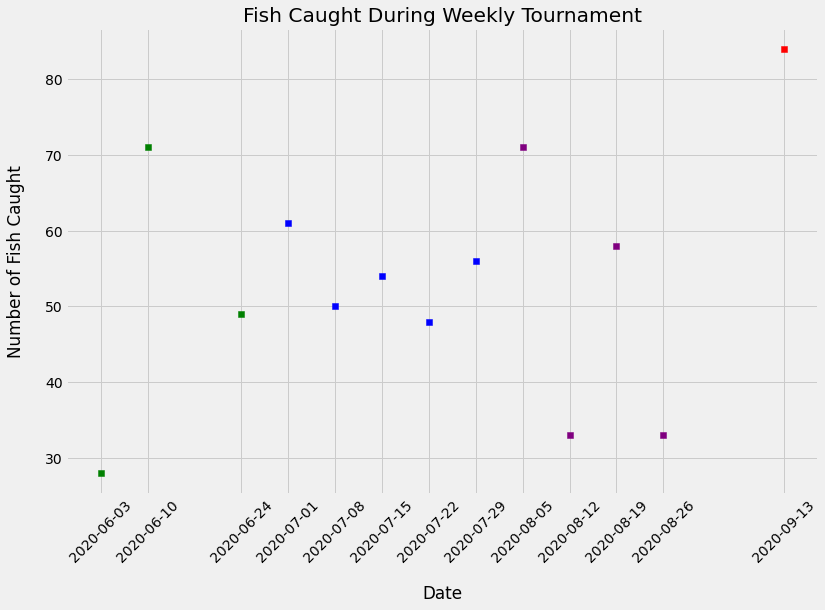

In [341]:
# Set the figure style and initalize a new figure
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of Total No of Fish Caught versus Date
plt.scatter(buddy_bass_2020.Date, buddy_bass_2020["Total No of Fish Caught"], marker="s", color=colors)

# Create a title and axis labels
plt.title("Fish Caught During Weekly Tournament")
plt.xlabel("Date", labelpad=20)
plt.xticks(buddy_bass_2020.Date, rotation=45)
plt.ylabel("Number of Fish Caught", labelpad=20)

# Show the plot
plt.show()

<h3><strong>2. Bar Plot</strong></h3>

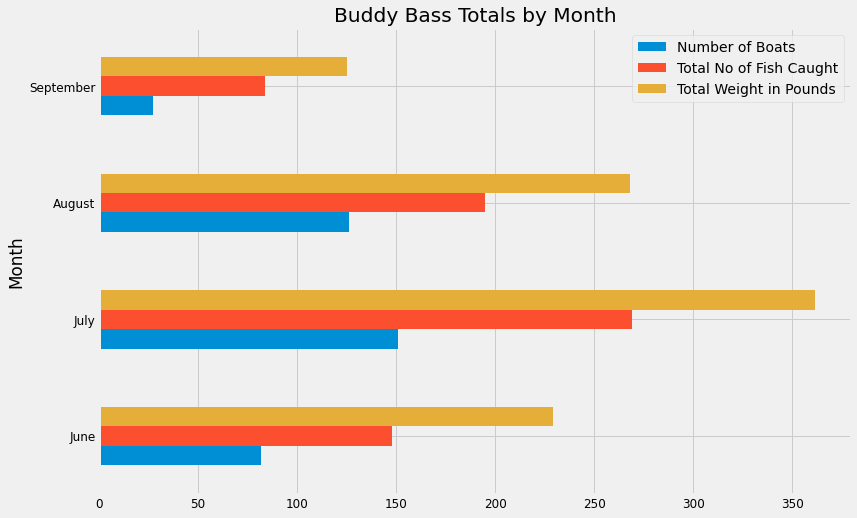

In [342]:
# Set the figure style and initalize a new figure
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (12, 8)

# Create a bar plot of total Number of Boats, No of Fish Caught, and Weight in Pounds by Month
buddy_bass_bar.plot(kind="barh", fontsize=12)

# Create a title and axis labels
plt.title("Buddy Bass Totals by Month")

# Show the plot
plt.show()

<h2><strong>5. Interpret the Data and Graphical Output</strong></h2>
<p>July had the most: Number of Boats, Total No of Fish Caught, and Total Weight in Pounds.</p>
<p>September had the least: Number of Boats, Total No of Fish Caught, and Total Weight in Pounds because there was only one Buddy Bass Tournament for the month.</p>